## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [5]:
len(df.user_id.unique())

290584

d. The proportion of users converted.

In [6]:
p_converted = df.converted.sum()/len(df.user_id.unique())
p_converted

0.12126269856564711

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df.query('group=="treatment" and landing_page!="new_page"').count() + df.query('group!="treatment" and landing_page=="new_page"').count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index.tolist(), axis=0)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

In [12]:
df2.shape

(290585, 5)

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2[df2['user_id'].duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
df2.loc[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2.drop(2893, inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
p_converted = df2.converted.sum()/df2.shape[0]
p_converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
old_page_converted = df2[(df2['group'] == 'control')].converted.sum()/df2[(df2['group'] == 'control')].converted.count()
old_page_converted

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
new_page_converted = df2[(df2['group'] == 'treatment')].converted.sum()/df2[(df2['group'] == 'treatment')].converted.count()
new_page_converted

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
p_new_page = df2[(df2['landing_page'] == 'new_page')].landing_page.count()/df2.shape[0]
p_new_page

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**The probabilities for the two groups converting lie too close.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: p_{old} - p_{new} \geq 0$$
$$H_1: p_{old} - p_{new} < 0$$

**I assume in my null hypothesis that the old page is doing better or at least as well as the new page. In consequence, the alternative must be that the new page is doing better.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
# number of individuals in the treatment group
n_new = df2.query('group == "treatment"').shape[0]
# number of individuals in the control group
n_old = df2.query('group == "control"').shape[0]
# number of individual in both groups
size = df2.shape[0]

#proportion of converted in treatment group
p_new = new_page_converted
#proportion of coverted individuals in control group
p_old = old_page_converted

# difference of p_new and p_old
p_diff = p_old - p_new

In [22]:
p_diff, p_new, p_old

(0.0015782389853555567, 0.11880806551510564, 0.1203863045004612)

In [23]:
p_new_null = []

for _ in range(10000):
# simulation of a conversion vector with p_conversion as a conversion probability
    p_new_null.append(np.random.choice([0,1], size, replace=True, p=[1-p_converted, p_converted]).mean())


In [24]:
p_new_null = np.array(p_new_null)
p_new_null.mean()

0.11959923017096605

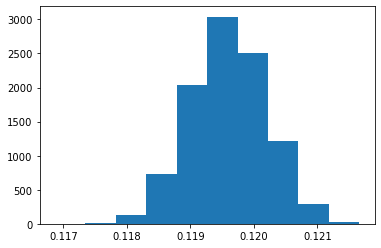

In [25]:
plt.hist(p_new_null);

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
p_old_null = []

for _ in range(10000):
# simulation of a conversion vector with p_new as a conversion probability
    p_old_null.append(np.random.choice([0,1], size, replace=True, p=[1-p_converted, p_converted]).mean())


In [27]:
p_old_null = np.array(p_old_null)
p_old_null.mean()

0.11958782830438013

In [28]:
# difference between p_old_null and p_new_null assuming that the the probability of conversion is the same for both pages.
round(p_new_null.mean() - p_old_null.mean(),4)

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [29]:
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [30]:
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [31]:
new_page_converted = np.random.choice([0,1], n_new, replace=True, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [32]:
old_page_converted = np.random.choice([0,1], n_old, replace=True, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [33]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

-0.002658592180420555

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [34]:
p_diffs = []
for _ in range(10000):
    p_n = np.random.choice([0,1], size, replace=True, p=[1-p_new, p_new]).mean()
    p_o = np.random.choice([0,1], size, replace=True, p=[1-p_old, p_old]).mean()
    p_diffs.append(p_n - p_o)

In [35]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

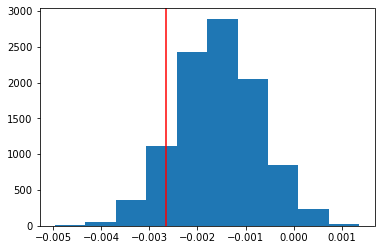

In [36]:
plt.hist(p_diffs);
plt.axvline(diff, c='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
#(p_diffs>p_diff).mean()
(p_diffs>diff).mean()

0.8999

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j we computed the probability to find test results that are at least as extreme as the results actually observed. This probability is called p-value. The smaller the p-value the stronger the evidence that the null hypothesis should be rejected.**

**In this case the p-value sustains the findings of part I: Based on the findings of the hypothesis testing we fail to reject the null hypothesis ($H_0: p_{old} - p_{new} \geq 0$).**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [39]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

In [40]:
n_old, n_new

(145274, 145310)

In [41]:
convert_old, convert_new

(17489, 17264)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [42]:
stat,pval = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new], alternative='two-sided')

In [43]:
stat, pval

(1.3109241984234394, 0.18988337448195103)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The proportions_z-test tests if two distributions are statistically different from each other.**

**In this specific case we compare the success rate of the old and the new page. I set up the hypothesis as follows:**

$$H_0: conversion-rate_{new} == conversion-rate_{old}$$
$$H_1: conversion-rate_{new}  != conversion-rate_{new}$$

**This means that the test is two-sided.**

**This computes a p-value of 0.19, which repeats the finding from the previous approaches: the null hypothesis cannot be rejected if a confidence level of 0.05 is assumed.**

**The z-score of 1.3 reflects the same: The area under the normal distribution curve at 1.3 standard deviations is about $1 - 2*.09 = .82$. To reach an alpha-level of 95% the z-score should be higher. So again, we cannot reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**As I want to find the probability of converting (i.e. a value between 0 and 1) I will use the logistic regression model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
df2['intercept']=1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

In [45]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [46]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [47]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        13:07:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**This model tries to predict whether a user will convert depending on his landing page. The p-value is 0.19 which suggests that there is no evidence to assume that the null is not true.**

**$H_0$: p(not converted and in treatment group) >= p(converted and in treatment group)**

**$H_1$: p(not converted and in treatment group) < p(converted and in treatment group)**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Adding other parameters, such as age, location, or gender of the users might bring insight into what kind of user group is more likely to convert to the new page. However, it is important to have a closer look at the data (e.g. are the parameter vectors linearly independent?) A coincidental correlation may lead to wrong conclusions. The more parameters are included, the more likely it becomes to find a statistically significant result by chance.**
**To mitigate this effect the Bonferroni correction can be applied.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [48]:
countries = pd.read_csv('./countries.csv')
df3 = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner') #Merging 2 data frames with index as user_id
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [49]:
df3[['ca','uk','us']] = pd.get_dummies(df3['country'])

In [50]:
logit_ca = sm.Logit(df3['converted'],df3[['intercept','ca']]).fit()
logit_ca.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:               1.259e-05
Time:                        13:08:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1016
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9941      0.006   -340.272      0.000      -2.006      -1.983
ca            -0.0434      0.027     -1.629      0.103      -0.096       0.009
==============================================================================
"""

In [51]:
logit_uk = sm.Logit(df3['converted'],df3[['intercept','uk']]).fit()
logit_uk.summary()

Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:               4.280e-06
Time:                        13:08:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3399
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9994      0.007   -302.640      0.000      -2.012      -1.986
uk             0.0126      0.013      0.955      0.340      -0.013       0.038
==============================================================================
"""

In [52]:
logit_us = sm.Logit(df3['converted'],df3[['intercept','us']]).fit()
logit_us.summary()

Optimization terminated successfully.
         Current function value: 0.366121
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:               7.678e-08
Time:                        13:08:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.8983
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9951      0.010   -190.998      0.000      -2.016      -1.975
us            -0.0016      0.012     -0.128      0.898      -0.026       0.023
==============================================================================
"""

**It seams that the origin has no inpact on whether a user is more likely to convert regardless of his group.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [53]:
## create new column us_treatment that is 0 unless the user is from ca and in the treatment group
df3['ca_treatment']=df3['ab_page']*df3['ca']
logit_ca_treatment = sm.Logit(df3['converted'],df3[['intercept','ca_treatment']]).fit()
logit_ca_treatment.summary()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:               2.016e-05
Time:                        13:08:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                   0.03834
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.9944      0.006   -344.689      0.000      -2.006      -1.983
ca_treatment    -0.0771      0.038     -2.052      0.040      -0.151      -0.003
================================================================================
"""

In [54]:
df3['uk_treatment']=df3['ab_page']*df3['uk']
logit_uk_treatment = sm.Logit(df3['converted'],df3[['intercept','uk_treatment']]).fit()
logit_uk_treatment.summary()

Optimization terminated successfully.
         Current function value: 0.366120
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:               4.544e-06
Time:                        13:08:49   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3255
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.9984      0.006   -326.853      0.000      -2.010      -1.986
uk_treatment     0.0170      0.017      0.985      0.325      -0.017       0.051
================================================================================
"""

In [55]:
df3['us_treatment']=df3['ab_page']*df3['us']
logit_us_treatment = sm.Logit(df3['converted'],df3[['intercept','us_treatment']]).fit()
logit_us_treatment.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:               8.979e-06
Time:                        13:09:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1669
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.9905      0.007   -281.174      0.000      -2.004      -1.977
us_treatment    -0.0166      0.012     -1.381      0.167      -0.040       0.007
================================================================================
"""

** **

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0